In [1]:
import pandas as pd
import numpy as np
!pip install alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries
import time
import math

In [3]:
van_api  = "63K71X7VJVVU8CVQ"
ts = TimeSeries(key = van_api, output_format='pandas')
nse_stock, md = ts.get_weekly(symbol = "SBIN.BO")
# (symbol="NSE:SBIN")
# INFY.NS
print(type(nse_stock))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df1 = pd.DataFrame(nse_stock)

In [5]:
df1.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-06-10,329.48,338.2999,328.545,332.46,61685346.0
2021-06-04,330.15,332.4550,323.480,330.35,49320352.0
2021-05-28,318.21,333.7800,318.030,328.73,75084394.0
2021-05-21,313.55,319.9300,303.570,316.23,79951132.0
2021-05-14,314.35,316.8500,298.190,315.94,105125150.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 473 entries, 2021-06-10 to 2012-05-25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    473 non-null    float64
 1   2. high    473 non-null    float64
 2   3. low     473 non-null    float64
 3   4. close   473 non-null    float64
 4   5. volume  473 non-null    float64
dtypes: float64(5)
memory usage: 22.2 KB


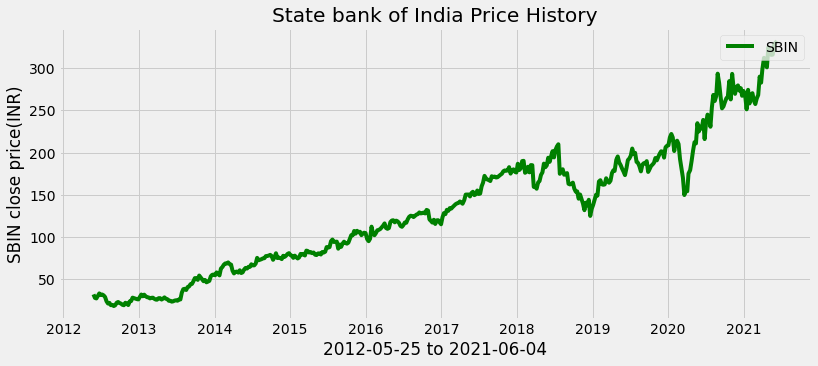

In [7]:
# Visualizing the close price for SBIN
# index --> date
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,5))
plt.plot(df1['4. close'], label = 'SBIN', color = 'green')
plt.xlabel('2012-05-25 to 2021-06-04')
plt.ylabel('SBIN close price(INR)')
plt.title('State bank of India Price History')
plt.legend(loc = 'upper right')
plt.show()

Calculating the SMA(Simple Moving Average)
   - A simple moving average is a technical indicator that can be used to     
     determine if a bull or bear trend will continue or reverse. 

In [8]:
SMA = pd.DataFrame()
SMA['SMA30'] = df1['4. close'].rolling(window = 30).mean()
# similarly we can use it to find the simple moving average 
# for the rest 100 days if required
SMA2 = pd.DataFrame()
SMA2['SMA100'] = df1['4. close'].rolling(window = 100).mean()
SMA
SMA2

,SMA100
date,
2021-06-10,NaN
2021-06-04,NaN
2021-05-28,NaN
2021-05-21,NaN
2021-05-14,NaN
...,...
2012-06-22,37.474649
2012-06-15,37.194590
2012-06-08,36.893190


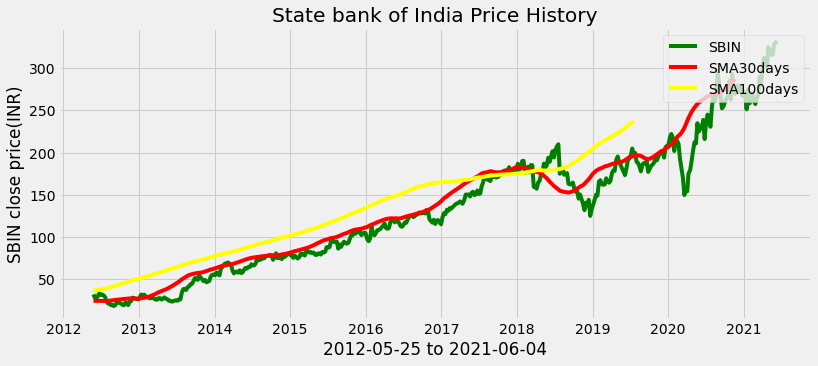

In [9]:
plt.figure(figsize = (12,5))
plt.plot(df1['4. close'], label = 'SBIN', color = 'green')
plt.plot(SMA['SMA30'], label = 'SMA30days', color = 'red')
plt.plot(SMA2['SMA100'], label = 'SMA100days', color = 'yellow')
plt.xlabel('2012-05-25 to 2021-06-04')
plt.ylabel('SBIN close price(INR)')
plt.title('State bank of India Price History')
plt.legend(loc = 'upper right')
plt.show()


In [10]:
# OVERALL DATA SKETCH
SMADF = pd.DataFrame()
SMADF['SBIN'] = df1['4. close']
SMADF['SMA30days'] = SMA['SMA30']
SMADF['SMA100days'] = SMA2['SMA100']

In [11]:
SMADF

,SBIN,SMA30days,SMA100days
date,,,
2021-06-10,332.460,NaN,NaN
2021-06-04,330.350,NaN,NaN
2021-05-28,328.730,NaN,NaN
2021-05-21,316.230,NaN,NaN
2021-05-14,315.940,NaN,NaN
...,...,...,...
2012-06-22,33.050,24.274717,37.474649
2012-06-15,30.014,24.217850,37.194590
2012-06-08,27.100,24.162517,36.893190


In [12]:
# now what we can do is that the project would help us in indicating when the right
# time to buy or sell a stock would be 


def marker_bpsp(SMADF):
    BP_indicator = []
    SP_indicator = []
    marker = -1
    for i in range(len(SMADF)):
        if SMADF['SMA100days'][i] < SMADF['SMA30days'][i]:
            if marker != 1:
                BP_indicator.append(SMADF['SBIN'][i])
                SP_indicator.append(np.nan)
                marker = 1
            else:
                BP_indicator.append(np.nan)
                SP_indicator.append(np.nan)
        elif SMADF['SMA100days'][i]> SMADF['SMA30days'][i]:
            if marker != 0:
                BP_indicator.append(np.nan)
                SP_indicator.append(SMADF['SBIN'][i])
                marker = 0
                
            else:
                BP_indicator.append(np.nan)
                SP_indicator.append(np.nan)
        else:
            BP_indicator.append(np.nan)
            SP_indicator.append(np.nan)
    return(BP_indicator, SP_indicator)


We can add the marker for buying and selling datapoint into a dataframe


In [13]:
BP_SP = marker_bpsp(SMADF)
SMADF['BP'] = BP_SP[0]
SMADF['SP'] = BP_SP[1]

In [14]:
SMADF

,SBIN,SMA30days,SMA100days,BP,SP
date,,,,,
2021-06-10,332.460,NaN,NaN,NaN,NaN
2021-06-04,330.350,NaN,NaN,NaN,NaN
2021-05-28,328.730,NaN,NaN,NaN,NaN
2021-05-21,316.230,NaN,NaN,NaN,NaN
2021-05-14,315.940,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2012-06-22,33.050,24.274717,37.474649,NaN,NaN
2012-06-15,30.014,24.217850,37.194590,NaN,NaN
2012-06-08,27.100,24.162517,36.893190,NaN,NaN


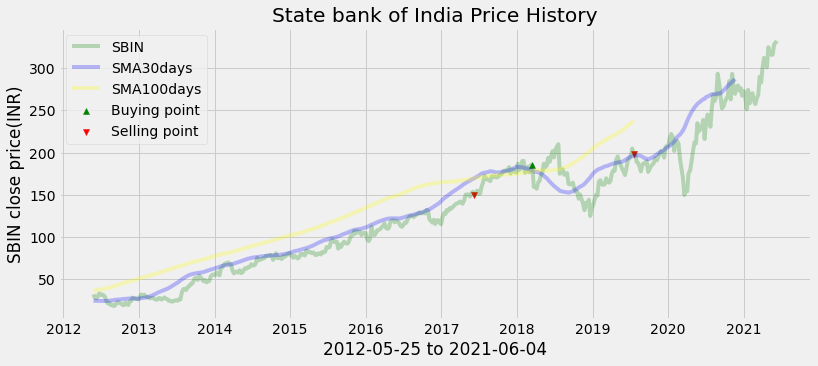

In [15]:
plt.figure(figsize = (12,5))
plt.plot(SMADF['SBIN'], label = 'SBIN', alpha = 0.25, color = 'green')
plt.plot(SMADF['SMA30days'], label = 'SMA30days', alpha = 0.25, color = 'blue')
plt.plot(SMADF['SMA100days'], label = 'SMA100days', alpha = 0.25, color = 'yellow')
plt.scatter(SMADF.index, SMADF['BP'], label = 'Buying point', color = 'green', marker = '^')
plt.scatter(SMADF.index, SMADF['SP'], label = 'Selling point', color = 'red', marker = 'v')
plt.xlabel('2012-05-25 to 2021-06-04')
plt.ylabel('SBIN close price(INR)')
plt.title('State bank of India Price History')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
df2 = pd.read_csv('FB.csv')

In [17]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-03-06,28.10,28.129999,27.350000,27.450001,27.450001,33532600
1,2013-03-07,27.57,28.680000,27.469999,28.580000,28.580000,74540200
2,2013-03-08,28.43,28.469999,27.730000,27.959999,27.959999,44198900
3,2013-03-11,28.01,28.639999,27.830000,28.139999,28.139999,35642100
4,2013-03-12,28.10,28.320000,27.600000,27.830000,27.830000,27569600


In [18]:
df2.info()
df2 = df2.set_index(pd.DatetimeIndex(df2['Date'].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1343 non-null   object 
 1   Open       1343 non-null   float64
 2   High       1343 non-null   float64
 3   Low        1343 non-null   float64
 4   Close      1343 non-null   float64
 5   Adj Close  1343 non-null   float64
 6   Volume     1343 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.6+ KB


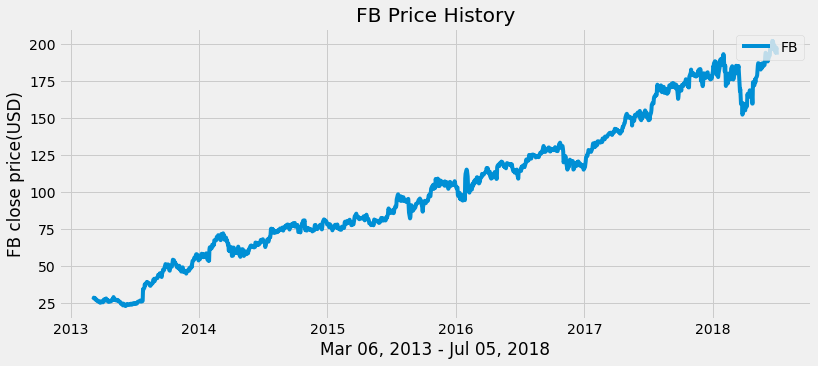

In [19]:
plt.figure(figsize = (12,5))
plt.plot(df2['Adj Close'], label = 'FB')
plt.xlabel('Mar 06, 2013 - Jul 05, 2018')
plt.ylabel('FB close price(USD)')
plt.title('FB Price History')
plt.legend(loc = 'upper right')
plt.show()

In [21]:
SMA2 = pd.DataFrame()
SMA2['SMA30'] = df2['Adj Close'].rolling(window = 30).mean()
# similarly we can use it to find the simple moving average 
# for the rest 100 days if required
SMA22 = pd.DataFrame()
SMA22['SMA100'] = df2['Adj Close'].rolling(window = 100).mean()
SMA2
# SMA2

,SMA30
2013-03-06,NaN
2013-03-07,NaN
2013-03-08,NaN
2013-03-11,NaN
2013-03-12,NaN
...,...
2018-06-27,191.698000
2018-06-28,192.132333
2018-06-29,192.484333
2018-07-02,192.973667


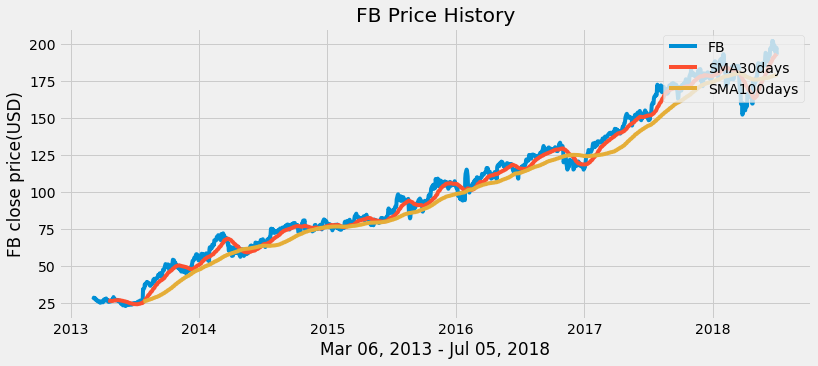

In [22]:
plt.figure(figsize = (12,5))
plt.plot(df2['Adj Close'], label = 'FB')
plt.plot(SMA2['SMA30'], label = 'SMA30days')
plt.plot(SMA22['SMA100'], label = 'SMA100days')
plt.xlabel('Mar 06, 2013 - Jul 05, 2018')
plt.ylabel('FB close price(USD)')
plt.title('FB Price History')
plt.legend(loc = 'upper right')
plt.show()

In [24]:
SMADF2 = pd.DataFrame()
SMADF2['FB'] = df2['Adj Close']
SMADF2['SMA30days'] = SMA2['SMA30']
SMADF2['SMA100days'] = SMA22['SMA100']
SMADF2

,FB,SMA30days,SMA100days
2013-03-06,27.450001,NaN,NaN
2013-03-07,28.580000,NaN,NaN
2013-03-08,27.959999,NaN,NaN
2013-03-11,28.139999,NaN,NaN
2013-03-12,27.830000,NaN,NaN
...,...,...,...
2018-06-27,195.839996,191.698000,178.5958
2018-06-28,196.229996,192.132333,178.7455
2018-06-29,194.320007,192.484333,178.8356
2018-07-02,197.360001,192.973667,179.0074


In [25]:
def marker_bpsp_2(SMADF2):
    BP_indicator = []
    SP_indicator = []
    marker = -1
    for i in range(len(SMADF2)):
        if SMADF2['SMA100days'][i] < SMADF2['SMA30days'][i]:
            if marker != 1:
                BP_indicator.append(SMADF2['FB'][i])
                SP_indicator.append(np.nan)
                marker = 1
            else:
                BP_indicator.append(np.nan)
                SP_indicator.append(np.nan)
        elif SMADF2['SMA100days'][i]> SMADF2['SMA30days'][i]:
            if marker != 0:
                BP_indicator.append(np.nan)
                SP_indicator.append(SMADF2['FB'][i])
                marker = 0
                
            else:
                BP_indicator.append(np.nan)
                SP_indicator.append(np.nan)
        else:
            BP_indicator.append(np.nan)
            SP_indicator.append(np.nan)
    return(BP_indicator, SP_indicator)


In [26]:
BP_SP2 = marker_bpsp_2(SMADF2)
SMADF2['BP'] = BP_SP2[0]
SMADF2['SP'] = BP_SP2[1]

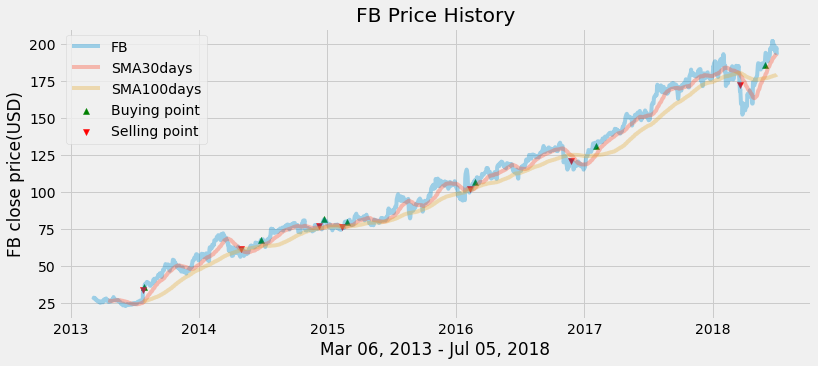

In [27]:
plt.figure(figsize = (12,5))
plt.plot(SMADF2['FB'], label = 'FB', alpha = 0.35)
plt.plot(SMADF2['SMA30days'], label = 'SMA30days', alpha = 0.35)
plt.plot(SMADF2['SMA100days'], label = 'SMA100days', alpha = 0.35)
plt.scatter(SMADF2.index, SMADF2['BP'], label = 'Buying point', marker = '^', color = 'green')
plt.scatter(SMADF2.index, SMADF2['SP'], label = 'Selling point', marker = 'v', color = 'red')
plt.xlabel('Mar 06, 2013 - Jul 05, 2018')
plt.ylabel('FB close price(USD)')
plt.title('FB Price History')
plt.legend(loc = 'upper left')
plt.show()

In [28]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2013-03-06,2013-03-06,28.10,28.129999,27.350000,27.450001,27.450001,33532600
2013-03-07,2013-03-07,27.57,28.680000,27.469999,28.580000,28.580000,74540200
2013-03-08,2013-03-08,28.43,28.469999,27.730000,27.959999,27.959999,44198900
2013-03-11,2013-03-11,28.01,28.639999,27.830000,28.139999,28.139999,35642100
2013-03-12,2013-03-12,28.10,28.320000,27.600000,27.830000,27.830000,27569600


Here we can use the Moving averages convergence/Divergence to determine an optimal point to buy or sell our stock based on the bull and bear trend

- for that we will have to calculate the line indicators and the short term exponential moving average(EMA)
- once that is done we can calculate the long term moving average

In [29]:
df3 = pd.DataFrame(df2)

In [30]:

df3 = df3.set_index(pd.DatetimeIndex(df3['Date'].values))

In [31]:
# Stock price visualization
sema = df3.Close.ewm(span = 12, adjust =False).mean()

In [32]:
lema = df3.Close.ewm(span = 26, adjust =False).mean()

In [33]:
# this is to calculate the moving average line indicator
mcad_df = sema - lema
marker1 = mcad_df.ewm(span = 9, adjust = False).mean()

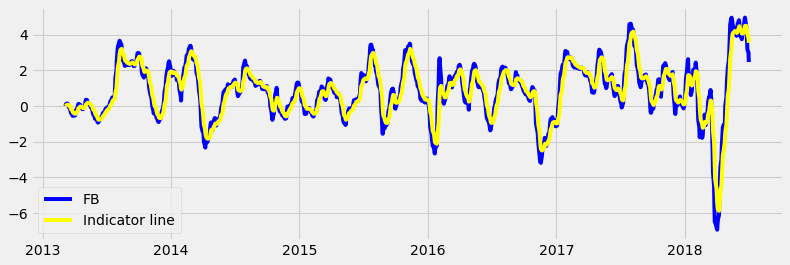

In [34]:
plt.figure(figsize = (12,4))
plt.plot(df3.index,mcad_df, label = 'FB', color = 'blue')
plt.plot(df3.index,marker1, label = 'Indicator line', color = 'yellow')
plt.legend(loc = 'lower left')
plt.show()

In [35]:
closedf = pd.read_csv('FB.csv')
closedf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1338,2018-06-27,199.179993,200.750000,195.800003,195.839996,195.839996,18734400
1339,2018-06-28,195.179993,197.339996,193.259995,196.229996,196.229996,18172400
1340,2018-06-29,197.320007,197.600006,193.960007,194.320007,194.320007,15811600
1341,2018-07-02,193.369995,197.449997,192.220001,197.360001,197.360001,13961600
1342,2018-07-03,194.550003,195.399994,192.520004,192.729996,192.729996,13489500


In [36]:
closedf = closedf.set_index(pd.DatetimeIndex(closedf['Date'].values))

In [37]:
closedf.shape

(1343, 7)

In [38]:
closedf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1343 entries, 2013-03-06 to 2018-07-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1343 non-null   object 
 1   Open       1343 non-null   float64
 2   High       1343 non-null   float64
 3   Low        1343 non-null   float64
 4   Close      1343 non-null   float64
 5   Adj Close  1343 non-null   float64
 6   Volume     1343 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 83.9+ KB


In [39]:
# specifying the target variable for the LSTM model
closecol = closedf.filter(['Close'])
closecol_arr = closecol.values
len_train = math.ceil(len(closecol_arr)*.8)

In [40]:
# 80% of the training data
len_train

1075

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
# scaling the values to be in between 0 and 1
slr = MinMaxScaler(feature_range = (0,1))
slr_close = slr.fit_transform(closecol_arr)

In [90]:
# spliting closecol into x and y dataset
X = []
Y = []
train_gen = slr_close[0:len_train,:]
for i in range(70,len(train_gen)):
    X.append(train_gen[i-70:i,0])
    Y.append(train_gen[i,0])
    if i<=70:
        print(X)
        print(Y)

[array([0.02540481, 0.03171413, 0.02825237, 0.02925739, 0.02752652,
       0.02333892, 0.02311558, 0.02093802, 0.02004467, 0.02037967,
       0.01652709, 0.01585706, 0.01580123, 0.01245114, 0.01289782,
       0.01781128, 0.01496371, 0.01468454, 0.01407035, 0.01870463,
       0.02328308, 0.02506979, 0.02205472, 0.02060302, 0.02607482,
       0.02858738, 0.02512563, 0.02021217, 0.02244556, 0.02082635,
       0.0155779 , 0.01580123, 0.01714126, 0.0171971 , 0.01792295,
       0.01809045, 0.02205472, 0.02278057, 0.02719151, 0.02529313,
       0.03389168, 0.03020658, 0.02607482, 0.02227805, 0.02356226,
       0.02311558, 0.02110553, 0.02188721, 0.02328308, 0.02065885,
       0.01803461, 0.01870463, 0.01596873, 0.01541039, 0.01261865,
       0.0120603 , 0.00787269, 0.00670017, 0.00234506, 0.00921272,
       0.00809604, 0.0053043 , 0.00346175, 0.        , 0.00039084,
       0.00217756, 0.00798437, 0.00630933, 0.00485762, 0.00463428])]
[0.004075929648241217]


In [91]:
# testing data split
X_test = []
Y_test = closecol_arr[len_train:,:]
test_gen = slr_close[len_train - 70:, :]
for i in range(70, len(test_gen)):
    X_test.append(test_gen[i-70:i,0])

In [103]:
X = np.array(X)
Y = np.array(Y)
# Reshaping the training data as LSTM only accepts 3D data
X = np.reshape(X, (X.shape[0],X.shape[1],1))
X.shape

(1005, 70, 1)

In [104]:
X_test =np.array(X_test)
X_test = np.reshape(X_test,(268,70,1))

In [105]:
X_test.shape

(268, 70, 1)

In [106]:
X_test.shape

(268, 70, 1)

In [47]:
# LSTM model
mod = Sequential()
mod.add(LSTM(50, return_sequences = True,input_shape = (70,1)))
mod.add(LSTM(50, return_sequences = True,input_shape = (70,1)))
mod.add(LSTM(50, return_sequences = False))
mod.add(Dense(25))
mod.add(Dense(1))
mod.compile(optimizer = 'adam', loss='mean_squared_error')

In [48]:
# Training the LSTM model
mod.fit(X,Y, batch_size = 1, epochs = 50)

Epoch 1/50
1005/1005 [==============================] - 27s 26ms/step - loss: 0.0017
Epoch 2/50
1005/1005 [==============================] - 28s 28ms/step - loss: 6.6474e-04
Epoch 3/50
1005/1005 [==============================] - 27s 27ms/step - loss: 6.5302e-04 8s - loss: 7.4889e- - ETA: 7s -
Epoch 4/50
1005/1005 [==============================] - 28s 27ms/step - loss: 4.1404e-04
Epoch 5/50
1005/1005 [==============================] - 25s 25ms/step - loss: 4.4431e-04 1s - ETA: 0s - loss: 4. - ETA: 0s - loss: 4.4594
Epoch 6/50
1005/1005 [==============================] - 28s 28ms/step - loss: 4.0555e-04
Epoch 7/50
1005/1005 [==============================] - 29s 29ms/step - loss: 2.3715e-04A: 2s - l
Epoch 8/50
1005/1005 [==============================] - 28s 28ms/step - loss: 2.7058e-04
Epoch 9/50
1005/1005 [==============================] - 29s 29ms/step - loss: 2.7145e-04
Epoch 10/50
1005/1005 [==============================] - 28s 28ms/step - loss: 5.5149e-04
Epoch 11/50
1005/1005 [

In [112]:
X_train_pred = mod.predict(X)

In [113]:
X_train_pred = slr.inverse_transform(X_train_pred)

In [115]:
Y_pred = mod.predict(X_test)

In [116]:
Y = np.reshape(Y, (Y.shape[0],1))
Y.shape

(1005, 1)

In [117]:
# the prediction should contain the same values as the Y_test

Y_pred = slr.inverse_transform(Y_pred)

In [118]:
from sklearn.metrics import mean_squared_error
testScore = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 5.58 RMSE


Here we have calculated the Root mean Square error value,The root mean square error (RMSE) is a method of calculating the difference between the values predicted by a model and the actual values.
- Lower the vlaue of RMSE the better

In [119]:
Y_pred[1]

array([145.95152], dtype=float32)

In [130]:
val = closecol[len_train:]
val['Y_pred'] = Y_pred
val['Y_pred']

<ipython-input-130-7804cbbfc574>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Y_pred'] = Y_pred


2017-06-12    147.654968
2017-06-13    145.951523
2017-06-14    148.503220
2017-06-15    148.143143
2017-06-16    147.242645
                 ...    
2018-06-27    190.803421
2018-06-28    189.727127
2018-06-29    188.879868
2018-07-02    188.097153
2018-07-03    189.603348
Name: Y_pred, Length: 268, dtype: float32

In [131]:
val['Close']

2017-06-12    148.440002
2017-06-13    150.679993
2017-06-14    150.250000
2017-06-15    149.800003
2017-06-16    150.639999
                 ...    
2018-06-27    195.839996
2018-06-28    196.229996
2018-06-29    194.320007
2018-07-02    197.360001
2018-07-03    192.729996
Name: Close, Length: 268, dtype: float64

In [140]:
from sklearn.metrics.pairwise import cosine_similarity

RE_close = np.array(val['Close'])
RE_Y_pred = np.array(val['Y_pred'])
RE_close=RE_close.reshape(1,-1)
RE_Y_pred=RE_Y_pred.reshape(1,-1)
cosine_similarity(RE_close,RE_Y_pred)

array([[0.99985826]])

Here we can see that the cosine similarity for both the cols  Y_pred and the Test value column are really similar, since the score is 0.99985826 out of 1 the similarity is really high.

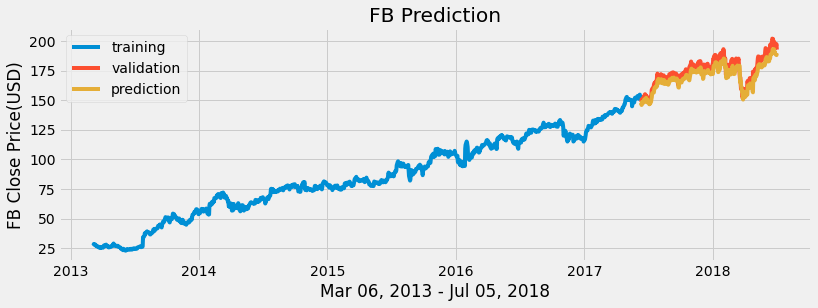

In [145]:
# Visualizing our data
plt.figure(figsize = (12,4))
plt.plot(closecol[:len_train])
plt.plot(val[['Close','Y_pred']])
plt.legend(['training','validation','prediction'])
plt.xlabel('Mar 06, 2013 - Jul 05, 2018')
plt.ylabel('FB Close Price(USD)')
plt.title('FB Prediction')
plt.show()